In [5]:
# @title Seeding for reproducibility

import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [6]:
# @title Importing the dependencies
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [7]:
# @title Data Curation
!pip install kaggle


In [8]:
kaggle_credentails = json.load(open("/content/drive/MyDrive/Project- Plant Disease /kaggle.json"))

In [9]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [10]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
!ls

 drive	'plantvillage dataset'	 plantvillage-dataset.zip   sample_data


In [12]:
# Unzip the downloaded dataset
with ZipFile("/content/plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [13]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Grape___healthy', 'Strawberry___Leaf_scorch', 'Tomato___healthy']
38
['Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Grape___healthy', 'Strawberry___Leaf_scorch', 'Tomato___healthy']
38
['Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Grape___healthy', 'Strawberry___Leaf_scorch', 'Tomato___healthy']


In [14]:
# @title Number of Classes = 38


print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['3d4723f3-7abf-4f74-adf2-7313e64c8c09___Mt.N.V_HL 6162.JPG', '5b2c9b7e-4f3a-4850-bd70-35230df9c794___Mt.N.V_HL 8933.JPG', '1fdf78d5-6036-4c48-b395-d41868e89f46___Mt.N.V_HL 9102.JPG', '87a06463-e4b9-477b-b294-c2eeb59ba485___Mt.N.V_HL 9006.JPG', 'a47c4d69-8888-45dd-93bf-8f3421960604___Mt.N.V_HL 9082.JPG']


In [15]:
# @title Data Preprocessing
# Dataset Path
base_dir = '/content/plantvillage dataset/color'

(256, 256, 3)


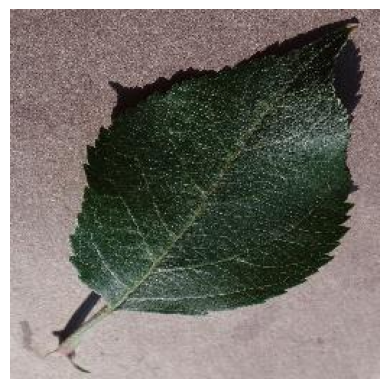

In [16]:
image_path = '/content/plantvillage dataset/color/Apple___healthy/0098dbd9-286a-4d6a-bf4b-5459d66f88c0___RS_HL 5776.JPG'

# Read img
img = mpimg.imread(image_path)

print(img.shape)
# Display img
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [17]:
image_path = '/content/plantvillage dataset/color/Apple___healthy/0098dbd9-286a-4d6a-bf4b-5459d66f88c0___RS_HL 5776.JPG'

# Read img
img = mpimg.imread(image_path)

print(img)

[[[125 105 104]
  [153 133 132]
  [177 157 156]
  ...
  [116  96  95]
  [103  83  82]
  [136 116 115]]

 [[122 102 101]
  [111  91  90]
  [114  94  93]
  ...
  [152 132 131]
  [114  94  93]
  [ 91  71  70]]

 [[131 111 110]
  [122 102 101]
  [129 109 108]
  ...
  [107  87  86]
  [132 112 111]
  [141 121 120]]

 ...

 [[204 193 191]
  [201 190 188]
  [198 187 185]
  ...
  [193 179 178]
  [194 180 179]
  [194 180 179]]

 [[200 189 187]
  [199 188 186]
  [198 187 185]
  ...
  [191 177 176]
  [194 180 179]
  [197 183 182]]

 [[206 195 193]
  [205 194 192]
  [203 192 190]
  ...
  [191 177 176]
  [196 182 181]
  [201 187 186]]]


In [18]:
# Img Dimensions
img_size = 224
batch_size = 32

In [19]:
# @title Train Test Split
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [20]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [21]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [22]:
# @title CNN

# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# @title Summary

# model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      47,776,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │           9,766 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# @title Compilation

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [26]:
# @title Model training
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 106s 78ms/step - accuracy: 0.9173 - loss: 0.2633 - val_accuracy: 0.8746 - val_loss: 0.4111
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.4911
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 106s 78ms/step - accuracy: 0.9679 - loss: 0.1041 - val_accuracy: 0.8651 - val_loss: 0.5236
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.8591
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 113s 83ms/step - accuracy: 0.9782 - loss: 0.0688 - val_accuracy: 0.8765 - val_loss: 0.5163


In [27]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - accuracy: 0.8740 - loss: 0.5341
Validation Accuracy: 87.65%


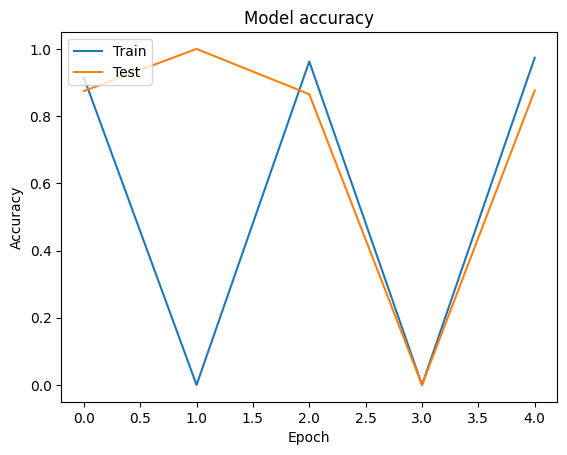

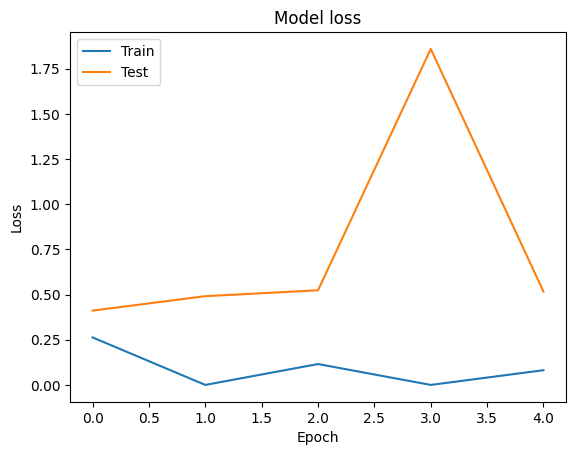

In [28]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [29]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [30]:

# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [31]:

class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [32]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [34]:

# Example Usage
image_path = '/content/drive/MyDrive/Project- Plant Disease /test_apple_black_rot.JPG'
#image_path = '/content/drive/MyDrive/Project- Plant Disease /test_potato_early_blight.jpg'
#image_path = '/content/drive/MyDrive/Project- Plant Disease /test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 782ms/step
Predicted Class Name: Apple___Black_rot


In [35]:
model.save('drive/MyDrive/Project-Plant_Disease/plant_disease_prediction_model.h5')

In [36]:
model.save('plant_disease_prediction_model.h5')